<a href="https://colab.research.google.com/github/udghosh/ADViews_Prediction/blob/main/Internship_Project_ADViews_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 from google.colab import files
 uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data_train = pd.read_csv("train.csv")

In [ ]:
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
data_train.shape


(14999, 9)

In [ ]:
data_train = data_train[data_train.views!='F']
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])


column_vidid=data_train['vidid']


In [ ]:
category = {'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
data_train['published']=data_train['published'].str.split("-").str[0]

In [ ]:
data_train["published"] = pd.to_numeric(data_train["published"])

In [ ]:

import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h ==''):
    h = '00'
  if(m ==''):
    m = '00'
  if(s ==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"] = time1
data_train.head()




,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016,457,6
1,VID_14135,2,1707,56,2,6,2016,570,4
2,VID_2187,1,2023,25,0,2,2016,136,3
3,VID_23096,6,620860,777,161,153,2016,262,8
4,VID_10175,1,666,1,0,0,2016,31,4


In [ ]:
data_train['adview'].mean()

2066.029719204755

In [ ]:
data_train['views'].mean()

711228.0128441621

In [ ]:
data_train['views'].max()

138047869

In [ ]:
data_train.describe()

,adview,views,likes,dislikes,comment,published,duration,category
count,1.463700e+04,1.463700e+04,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000
mean,2.066030e+03,7.112280e+05,2785.841293,254.429391,409.135547,2014.437521,1040.179067,4.607228
std,5.282706e+04,2.731475e+06,8938.490736,1029.774864,1511.176934,1.770521,2316.818747,1.576312
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,2005.000000,0.000000,1.000000
25%,1.000000e+00,3.151700e+04,88.000000,7.000000,7.000000,2013.000000,187.000000,4.000000
50%,2.000000e+00,1.586680e+05,450.000000,38.000000,46.000000,2015.000000,325.000000,4.000000
75%,6.000000e+00,5.836130e+05,1863.000000,167.000000,224.000000,2016.000000,723.000000,6.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2017.000000,42317.000000,8.000000


In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016,457,6
1,VID_14135,2,1707,56,2,6,2016,570,4
2,VID_2187,1,2023,25,0,2,2016,136,3
3,VID_23096,6,620860,777,161,153,2016,262,8
4,VID_10175,1,666,1,0,0,2016,31,4


In [ ]:
data_train['category'].value_counts()

4    7383
7    2473
5    1597
2     970
6     879
3     556
8     421
1     358
Name: category, dtype: int64

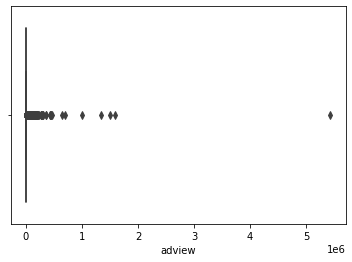

In [ ]:
sns.boxplot(x='adview',data=data_train)
plt.show()

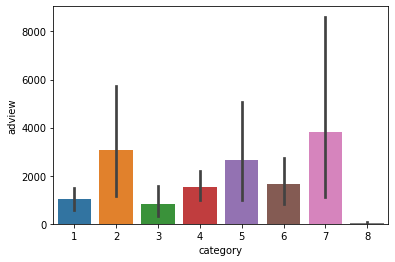

In [ ]:
sns.barplot(y='adview',x='category',data=data_train)

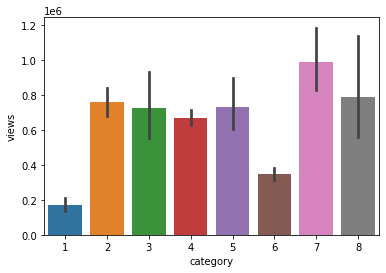

In [ ]:
sns.barplot(y='views',x='category',data=data_train)

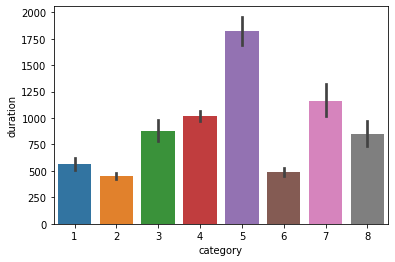

In [ ]:
sns.barplot(y='duration',x='category',data=data_train)

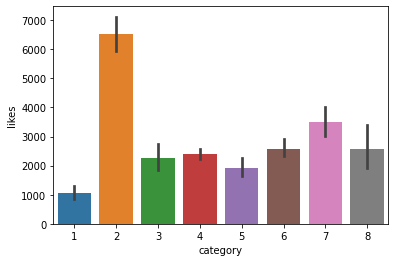

In [ ]:
sns.barplot(y='likes',x='category',data=data_train)

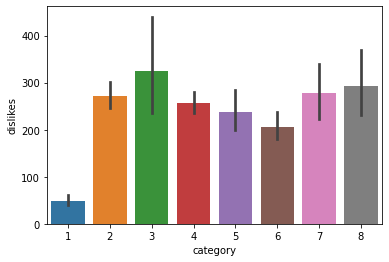

In [ ]:
sns.barplot(y='dislikes',x='category',data=data_train)

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016,457,6
1,VID_14135,2,1707,56,2,6,2016,570,4
2,VID_2187,1,2023,25,0,2,2016,136,3
3,VID_23096,6,620860,777,161,153,2016,262,8
4,VID_10175,1,666,1,0,0,2016,31,4


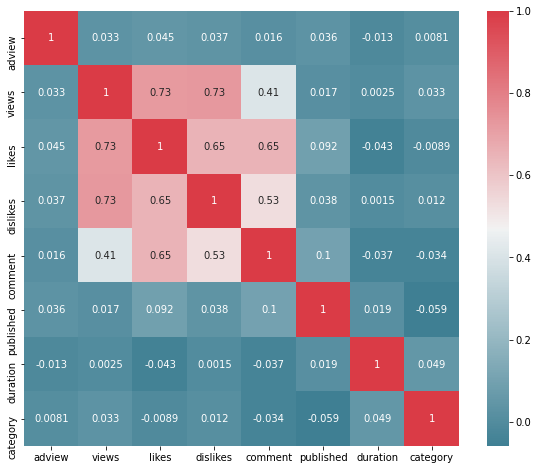

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

In [ ]:
data_train=data_train[data_train['adview']<5]

In [ ]:
data_train.shape

(10261, 9)

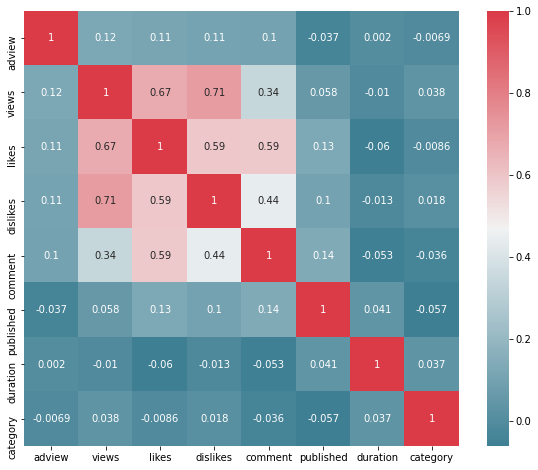

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

In [ ]:
data_train=data_train.drop(['comment','duration','published','category','vidid'],axis=1)

In [ ]:
data_train.head()

,adview,views,likes,dislikes
1,2,1707,56,2
2,1,2023,25,0
4,1,666,1,0
5,4,78,0,0
7,1,14205,55,16


In [ ]:
Y_train = pd.DataFrame(data = data_train.iloc[:,0].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)

data_train.head()

,views,likes,dislikes
1,1707,56,2
2,2023,25,0
4,666,1,0
5,78,0,0
7,14205,55,16


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

(8208, 3)

In [ ]:
Y_train

,target
0,2
1,1
2,1
3,4
4,1
...,...
10256,2
10257,1
10258,4
10259,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.0116047029222642

In [ ]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error: 0.7658055781168182
Mean Squared Error: 0.8392270647919609
Root Mean Squared Error: 0.9160933712193102


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test, y_test, supportvector_regressor)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.6713548641717124
Mean Squared Error: 0.9591349960383855
Root Mean Squared Error: 0.9793543771477133


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 0.9600132210702108
Mean Squared Error: 1.8795693832818077
Root Mean Squared Error: 1.3709738813273606


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 0.7997598587345385
Mean Squared Error: 0.9182131609169149
Root Mean Squared Error: 0.9582343976903119


In [ ]:
# Artificial Neural Network
import tensorflow as tf
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
257/257 [==============================] - 1s 2ms/step - loss: 2.0064
Epoch 2/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8835
Epoch 3/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8788
Epoch 4/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8761
Epoch 5/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8746
Epoch 6/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8729
Epoch 7/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8724
Epoch 8/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8714
Epoch 9/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8696
Epoch 10/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8694
Epoch 11/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8671
Epoch 12/100
257/257 [==============================] - 1s 2ms/step - loss: 0.8659
Epoch 13/100


In [ ]:
print_error(X_test,y_test, ann)

Mean Absolute Error: 0.7797104083092341
Mean Squared Error: 0.8624705764384
Root Mean Squared Error: 0.9286929398021716


In [ ]:
y_pred = ann.predict(X_test)
y_test=np.array(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.7220732  1.        ]
 [1.49759722 1.        ]
 [1.58764887 2.        ]
 ...
 [1.49956107 2.        ]
 [1.51415503 2.        ]
 [1.93598592 1.        ]]


In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test (1).csv to test (1).csv


In [ ]:
data_test = pd.read_csv("test (1).csv")

In [ ]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
data_test.shape

(8764, 8)

In [ ]:
data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
data_test=data_test.drop(['comment','duration','published','category','vidid'],axis=1)

In [ ]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_test=scaler.fit_transform(data_test)

In [ ]:
y_final=ann.predict(data_test)
y_final=np.round(y_final)

In [ ]:
y_final

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [1.]], dtype=float32)

In [ ]:
pd.DataFrame(y_final).to_csv('Predications.csv')